In [74]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/6883/Machine_Learning'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/6883/Machine_Learning


In [75]:
import pandas as pd
df = pd.read_csv('df_ape_preprocessed_2.csv')

In [76]:
df['last_sale_price'][3]


"{'asset_type': 'ETH', 'contract_address': None, 'price': 120.0, 'price_usd': 351944.71340875066}"

#Data Preprocessing

In [77]:
import json
def parse_metadata(x):
    try:
        x = x.replace("None", "null")
        x = x.replace("'", "\"")
        return json.loads(x)
    except json.JSONDecodeError as e:
        print(f"Error parsing metadata: {x}")
        return None


def extract_attributes(metadata):
    if metadata['asset_type'] is None:
        return None
    return metadata['price']

In [78]:
print(parse_metadata(df['last_sale_price'][3])['price'])

120.0


In [79]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

to_drop = ['token_id','metadata','file_url','creator_address','updated_date.1','attributes','strategy','updated_date']
df_dropped = df.drop(to_drop,axis =1)

# Drop rows with last_sale_price = NA
df2 = df_dropped.dropna(subset=['last_sale_price'])

# Apply 'parse_metadata()' function to 'last_sale_price' column
df_price = df2['last_sale_price'].apply(parse_metadata)

# Extract 'price' key from parsed metadata dictionary and rename column
df2 = df_dropped.rename(columns={'last_sale_price': 'ETH'})
df2['ETH'] = df_price.apply(extract_attributes)



In [80]:
df2 = df2.dropna(subset = ['ETH'])

In [83]:
df2.to_csv('df_ape_price_woencoding.csv')

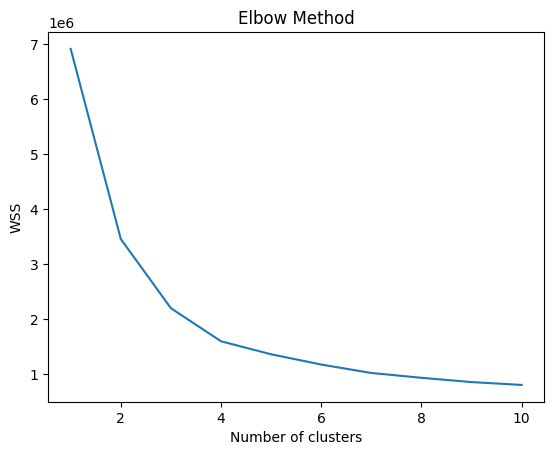

In [ ]:
# Impute missing values with the most frequent value
# imputer = SimpleImputer(strategy='most_frequent')
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
df2 = df2.dropna(subset = ['ETH'])

# Replace NaN values with -1
df2 = df2.replace(np.nan, -1)
# df2 = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)

# Convert categorical variables to numerical
# Convert categorical variables to numerical
df2[['metadata_Earring', 'metadata_Background', 'metadata_Fur', 'metadata_Clothes', 'metadata_Mouth', 'metadata_Eyes', 'metadata_Hat']] = df2[['metadata_Earring', 'metadata_Background', 'metadata_Fur', 'metadata_Clothes', 'metadata_Mouth', 'metadata_Eyes', 'metadata_Hat']].astype(str)
# df2 = pd.get_dummies(df2, columns=['metadata_Earring', 'metadata_Background', 'metadata_Fur', 'metadata_Clothes', 'metadata_Mouth', 'metadata_Eyes', 'metadata_Hat'])
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df2[['metadata_Earring', 'metadata_Background', 'metadata_Fur', 'metadata_Clothes', 'metadata_Mouth', 'metadata_Eyes', 'metadata_Hat']] = encoder.fit_transform(df2[['metadata_Earring', 'metadata_Background', 'metadata_Fur', 'metadata_Clothes', 'metadata_Mouth', 'metadata_Eyes', 'metadata_Hat']])
# Normalize numerical variables
scaler = MinMaxScaler()
df2[['rank']] = scaler.fit_transform(df2[['rank']])

# Determine the number of clusters
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df2)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()





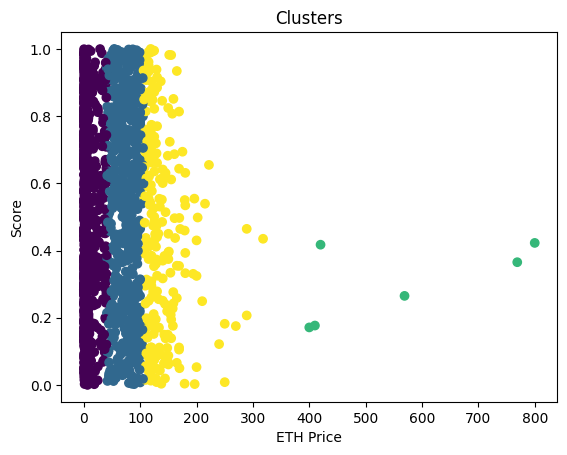

In [ ]:
# Perform clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df2)

# Visualize clusters
plt.scatter(df2['ETH'], df2['rank'], c=pred_y)
plt.title('Clusters')
plt.xlabel('ETH Price')
plt.ylabel('Score')
plt.show()

In [ ]:
df2.to_csv('df_ape_')

,ETH,score,rank,collection_size,metadata_Earring,metadata_Background,metadata_Fur,metadata_Clothes,metadata_Mouth,metadata_Eyes,metadata_Hat
2,80.00,1.013408,0.407011,10000,0.0,1.0,8.0,22.0,1.0,11.0,5.0
3,120.00,0.906213,0.774161,10000,0.0,8.0,6.0,0.0,4.0,21.0,18.0
5,93.00,0.823711,0.954432,10000,0.0,6.0,3.0,0.0,10.0,16.0,12.0
6,38.50,0.863739,0.887031,10000,0.0,6.0,6.0,24.0,4.0,8.0,0.0
7,80.00,1.025079,0.374261,10000,0.0,4.0,4.0,40.0,31.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,20.00,1.231386,0.040561,10000,0.0,1.0,14.0,13.0,17.0,10.0,0.0
1996,115.69,0.951418,0.620330,10000,5.0,1.0,10.0,0.0,1.0,19.0,18.0
1997,2.00,0.813638,0.965048,10000,0.0,7.0,13.0,0.0,1.0,6.0,22.0
1998,2.00,1.038416,0.336104,10000,0.0,3.0,9.0,41.0,4.0,10.0,9.0


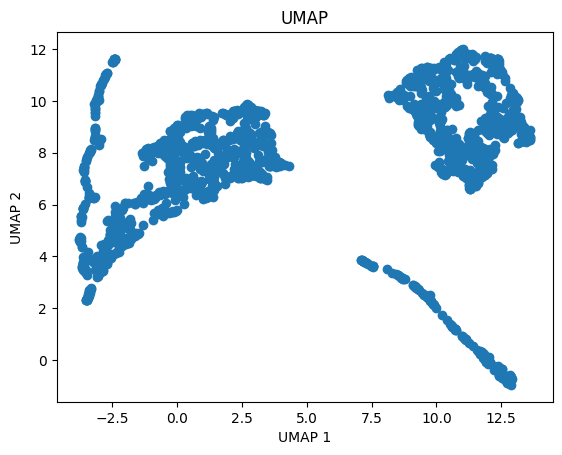

In [ ]:
import umap
# Create UMAP plot
reducer = umap.UMAP(random_state=0)
embedding = reducer.fit_transform(df2[['ETH', 'score', 'rank', 'collection_size', 'metadata_Earring', 'metadata_Background', 'metadata_Fur', 'metadata_Clothes', 'metadata_Mouth', 'metadata_Eyes', 'metadata_Hat']])

plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()